In [1]:
%matplotlib widget

import ipywidgets as widgets
from ipywidgets import HBox, VBox, jslink, Box, Layout
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction, bode, lsim
from scipy import signal
import control as control
from IPython.display import Math, display, Image, Markdown, Latex

In [2]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 5px 5px 0px',
        padding='2px 2px 2px 2px'
     )

# Vergleich Einstellverfahren: Reinisch vs. Symmetrisches Optimum

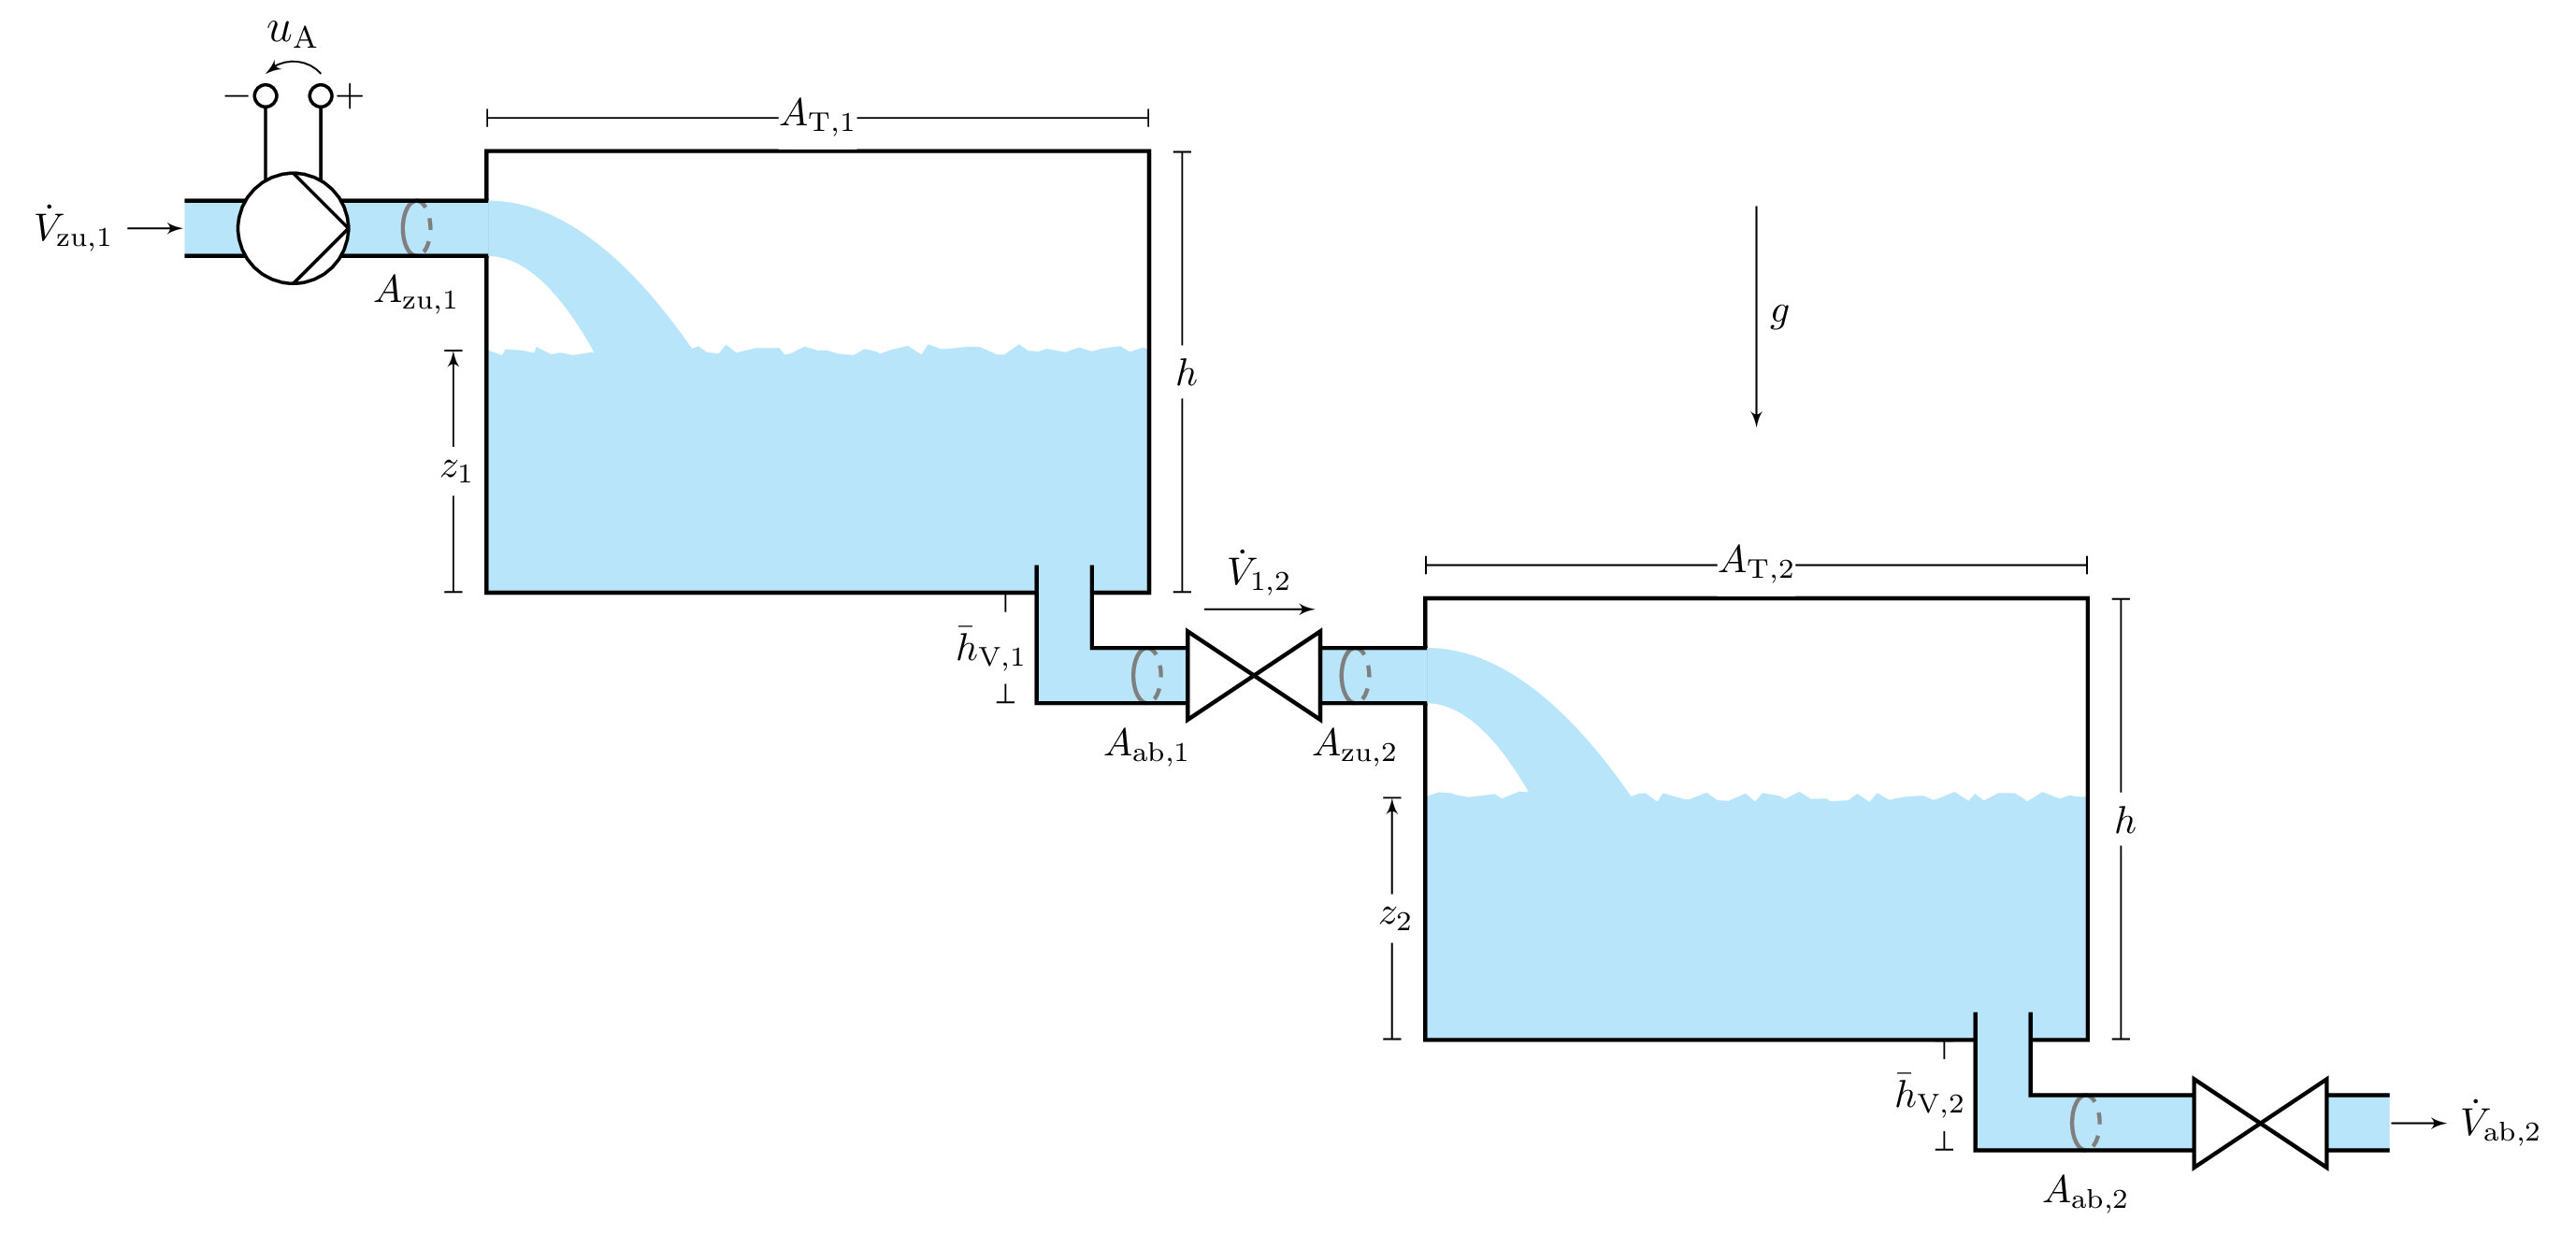

In [3]:
imag = Image("../../images/zweitank.png", width=800)
display(imag)

## 2-Tanksystem

- lineares Modell im Zeitbereich
    \begin{align*}
        \dot{\tilde{z}}_1(t) & = a_{11} \tilde{z}_1(t) + b \tilde{u}_{\text{A}}(t)\\
        \dot{\tilde{z}}_2(t) & = a_{21} \tilde{z}_1(t) + a_{22} \tilde{z}_2(t) 
    \end{align*}
    mit Ausgang $y(t) = \tilde{z}_2(t)$ bzw.
    \begin{align*}
        T_1T_2\ddot{\tilde{z}}_2(t) + (T_1 + T_2)\dot{\tilde{z}}_2(t) + \tilde{z}_2(t) & = K \tilde{u}_{\text{A}}(t)
    \end{align*}
- lineares Modell im Bildbereich
    \begin{align*}
        P(s) &= \frac{\tilde{Z}_2(s)}{\tilde{U}_{\text{A}}(s)} = \frac{K_\mathrm{S}}{(1 + T_1 s) (1 + T_2 s)} = \frac{0.15}{(1 + 68.21 s) (1 + 34.57 s)}
    \end{align*}

__Definition Parameter__

In [4]:
tSim = np.linspace(0, 500, 501)
f = np.logspace(-5, 1)

In [5]:
T1 = 68.21
T2 = 34.57
KS = 0.15

In [6]:
sys = control.TransferFunction([KS], [T1 * T2, T1 + T2, 1])
wSys, magSys, phaseSys = bode(sys.returnScipySignalLTI()[0][0], f)

## Regler

* da System 2.Ordnung $\Rightarrow$ PI-Regler
\begin{align*}
    R(s) & = K_{\mathrm{R}} \frac{1 + T_{\mathrm{N}} s}{T_{\mathrm{N}} s}
\end{align*}

* offener Kreis
\begin{align*}
    G_0(s) & = R(s) P(s) = K_{\mathrm{R}} \frac{1 + T_{\mathrm{N}} s}{T_{\mathrm{N}} s}\frac{K_\mathrm{S}}{(1 + T_1 s) (1 + T_2 s)}
\end{align*}


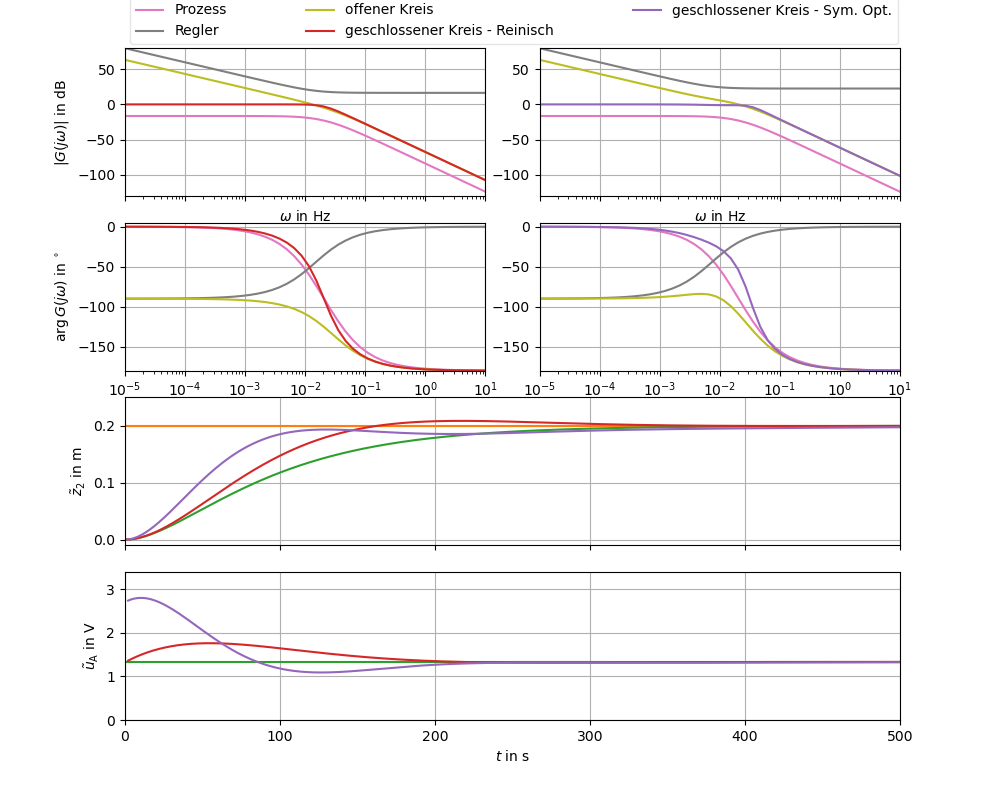

In [7]:
output = widgets.Output()

with output:
    fig = plt.figure(figsize=(10, 8))
    ax1 = plt.subplot(421)
    ax2 = plt.subplot(422)
    ax3 = plt.subplot(423)
    ax4 = plt.subplot(424)
    ax5 = plt.subplot(413)
    ax6 = plt.subplot(414)
    
plt.subplots_adjust(wspace=0.15, hspace=0.18)
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.subplots_adjust(bottom=0.1, top=0.94, left=0.125, right=0.9)

ax1.set_xlim([f[0], f[-1]]) 
ax1.set_ylim([-130, 80]) 
ax2.set_xlim([f[0], f[-1]]) 
ax2.set_ylim([-130, 80]) 
ax3.set_xlim([f[0], f[-1]]) 
ax3.set_ylim([-180, 5]) 
ax4.set_xlim([f[0], f[-1]]) 
ax4.set_ylim([-180, 5]) 
ax5.set_xlim([0, tSim[-1]]) 
ax5.set_ylim([-0.01, 0.25]) 
ax6.set_xlim([0, tSim[-1]]) 
ax6.set_ylim([0., 3.4]) 
[label.set_visible(False) for label in ax1.get_xticklabels()]
[label.set_visible(False) for label in ax2.get_xticklabels()]
[label.set_visible(False) for label in ax5.get_xticklabels()]
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax1.set_xlabel(r"$\omega$ in Hz")
ax2.set_xlabel(r"$\omega$ in Hz")
ax1.set_ylabel(r"$|G(j \omega)|$ in dB")
ax3.set_ylabel(r"$\mathrm{arg}\, G(j\omega)$ in $^{\circ}$")
ax5.set_ylabel(r'$\tilde{z}_2$ in m')
ax6.set_ylabel(r'$\tilde{u}_{\mathrm{A}}$ in V')
ax6.set_xlabel(r'$t$ in s')

magSysR, = ax1.semilogx([], [], 'C6', label='Prozess')
magCtrlR, = ax1.semilogx([], [], 'C7', label=r'Regler')
magG0R, = ax1.semilogx([], [], 'C8', label=r'offener Kreis')
magGR, = ax1.semilogx([], [], 'C3', label=r'geschlossener Kreis - Reinisch')
phaseSysR, = ax3.semilogx([], [], 'C6', label='Prozess')
phaseCtrlR, = ax3.semilogx([], [], 'C7', label=r'Regler')
phaseG0R, = ax3.semilogx([], [], 'C8', label=r'offener Kreis')
phaseGR, = ax3.semilogx([], [], 'C3', label=r'geschlossener Kreis - Reinisch')
magSysS, = ax2.semilogx([], [], 'C6', label='Prozess')
magCtrlS, = ax2.semilogx([], [], 'C7', label=r'Regler')
magG0S, = ax2.semilogx([], [], 'C8', label=r'offener Kreis')
magGS, = ax2.semilogx([], [], 'C4', label=r'geschlossener Kreis - Sym. Opt.')
phaseSysS, = ax4.semilogx([], [], 'C6', label='Prozess')
phaseCtrlS, = ax4.semilogx([], [], 'C7', label=r'Regler')
phaseG0S, = ax4.semilogx([], [], 'C8', label=r'offener Kreis')
phaseGS, = ax4.semilogx([], [], 'C4', label=r'geschlossener Kreis - Sym. Opt.')
simRef, = ax5.plot([], [], label='Sollwert', color='C1')
simStep, = ax5.plot([], [], label='Sprungantwort', color='C2')
simR, = ax5.plot([], [], label='Reinisch', color='C3')
simS, = ax5.plot([], [], label='Symmetrisches Optimum', color='C4')
simuStep, = ax6.plot([], [], label='Sprungantwort', color='C2')
simuR, = ax6.plot([], [], label='Reinisch', color='C3')
simuS, = ax6.plot([], [], label='Symmetrisches Optimum', color='C4')

handlesAx1, labelsAx1 = ax1.get_legend_handles_labels()
handlesAx2, labelsAx2 = ax2.get_legend_handles_labels()
fig.legend([handle for i, handle in enumerate(handlesAx1 + [handlesAx2[-1]])],
           [label for i, label in enumerate(labelsAx1 + [labelsAx2[-1]])],
           bbox_to_anchor=(0.13, 0.945, 0.7675, .15), loc=3,
           ncol=3, mode="expand", borderaxespad=0., framealpha=0.5)

sliderASym = widgets.FloatSlider(value=2,
                                 min=0.5,
                                 max=4,
                                 step=0.25,
                                 description='Reinisch: a')

sliderAReinisch = widgets.FloatSlider(value=2,
                                      min=0.5,
                                      max=4,
                                      step=0.25,
                                      description='Sym. Opt.: a')

def calcSystem(_):    
    def calcData(KP, Tn):
        ctrl = control.TransferFunction([KP * Tn, KP],[Tn, 0])
        wCtrl, magCtrl, phaseCtrl = bode(ctrl.returnScipySignalLTI()[0][0], f)
        G0 = (ctrl * sys).minreal()
        wG0, magG0, phaseG0 = bode(G0.returnScipySignalLTI()[0][0], f)
        G = (G0 / (1 + G0)).minreal()
        wG, magG, phaseG = bode(G.returnScipySignalLTI()[0][0], f)
        
        return wCtrl, magCtrl, phaseCtrl, wG0, magG0, phaseG0, wG, magG, phaseG, G
    
    def calcSymOpt(a):
        TSum = T2
        Tn = a ** 2 * TSum
        KP = Tn / (a * KS * TSum)        
        return calcData(KP, Tn)
            
    def calcReinisch(a):
        TSum = T2
        Tn = T1
        KP = Tn / (a * KS * TSum)
        return calcData(KP, Tn)

    aS = sliderASym.value
    aR = sliderAReinisch.value
    
    z2Ref = 0.2
    uA0 = z2Ref / KS
    
    wCtrlReinisch, magCtrlReinisch, phaseCtrlReinisch, wG0Reinisch, magG0Reinisch, phaseG0Reinisch, wGReinisch, magGReinisch, phaseGReinisch, GReinisch = calcReinisch(aR)
    wCtrlSym, magCtrlSym, phaseCtrlSym, wG0Sym, magG0Sym, phaseG0Sym, wGSym, magGSym, phaseGSym, GSym = calcSymOpt(aS)
    
    tSimSys, ySimSys, _ = signal.lsim(sys.returnScipySignalLTI()[0][0], U=np.ones(len(tSim)) * uA0, T=tSim)
    tSimCtrlReinisch, ySimCtrlReinisch, xSimCtrlReinisch = signal.lsim(GReinisch.returnScipySignalLTI()[0][0], U=np.ones(len(tSim)) * z2Ref, T=tSim)
    tSimCtrlSym, ySimCtrlSym, xSimCtrlSym = signal.lsim(GSym.returnScipySignalLTI()[0][0], U=np.ones(len(tSim)) * z2Ref, T=tSim)
    
    uSimCtrlReinisch = (ySimCtrlReinisch[2:] + (T1 + T2) * np.diff(ySimCtrlReinisch)[1:] + T1 * T2 * np.diff(ySimCtrlReinisch, 2)) / KS
    uSimCtrlSym = (ySimCtrlSym[2:] + (T1 + T2) * np.diff(ySimCtrlSym)[1:] + T1 * T2 * np.diff(ySimCtrlSym, 2)) / KS
    
    magSysR.set_data(wSys, magSys)
    magCtrlR.set_data(wCtrlReinisch, magCtrlReinisch)
    magG0R.set_data(wG0Reinisch, magG0Reinisch)
    magGR.set_data(wGReinisch, magGReinisch)
    phaseSysR.set_data(wSys, phaseSys)
    phaseCtrlR.set_data(wCtrlReinisch, phaseCtrlReinisch)
    phaseG0R.set_data(wG0Reinisch, phaseG0Reinisch)
    phaseGR.set_data(wGReinisch, phaseGReinisch)
    
    magSysS.set_data(wSys, magSys)
    magCtrlS.set_data(wCtrlSym, magCtrlSym)
    magG0S.set_data(wG0Sym, magG0Sym)
    magGS.set_data(wGSym, magGSym)
    phaseSysS.set_data(wSys, phaseSys)
    phaseCtrlS.set_data(wCtrlSym, phaseCtrlSym)
    phaseG0S.set_data(wG0Sym, phaseG0Sym)
    phaseGS.set_data(wGSym, phaseGSym)
    
    simRef.set_data(tSim, np.ones(len(tSim)) * z2Ref)
    simStep.set_data(tSimSys, ySimSys)
    simR.set_data(tSimCtrlReinisch, ySimCtrlReinisch)
    simS.set_data(tSimCtrlSym, ySimCtrlSym)

    simuStep.set_data(tSim, np.ones(len(tSim)) * uA0)
    simuR.set_data(tSim[2:], uSimCtrlReinisch)
    simuS.set_data(tSim[2:], uSimCtrlSym)

    fig.canvas.draw()
    
sliderASym.observe(calcSystem, names='value')
sliderAReinisch.observe(calcSystem, names='value')

calcSystem(_)

ffControls = HBox([sliderAReinisch, sliderASym])
ffControls.layout = make_box_layout()

VBox([ffControls, output], layout=Layout(display='flex', flex_flow='row', justify_content='center', align_items='center'))